<h2> CNN on MNIST </h2> 

In [2]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

Using TensorFlow backend.


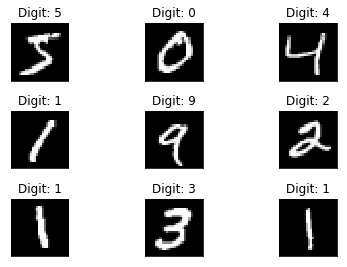

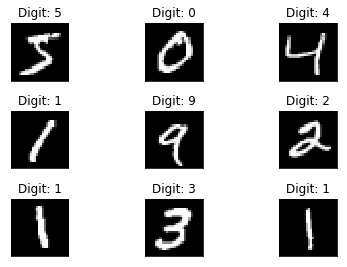

In [3]:
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
fig

<h2> CNN + ReLU + ADAM with 3 Layers </h2> 

In [4]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 7

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(24, kernel_size=(7, 7),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Conv2D(32, (7, 7), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (7, 7), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_info=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 182s 3ms/step - loss: 0.1694 - acc: 0.9498 - val_loss: 0.0906 - val_acc: 0.9717
Epoch 2/7
60000/60000 [==============================] - 172s 3ms/step - loss: 0.0563 - acc: 0.9830 - val_loss: 0.0360 - val_acc: 0.9886
Epoch 3/7
60000/60000 [==============================] - 174s 3ms/step - loss: 0.0396 - acc: 0.9883 - val_loss: 0.0239 - val_acc: 0.9923
Epoch 4/7
60000/60000 [==============================] - 176s 3ms/step - loss: 0.0315 - acc: 0.9899 - val_loss: 0.0320 - val_acc: 0.9906
Epoch 5/7
60000/60000 [==============================] - 151s 3ms/step - loss: 0.0256 - acc: 0.9919 - val_loss: 0.0254 - val_acc: 0.9913
Epoch 6/7
60000/60000 [==============================] - 177s 3ms/step - loss: 0.0225 - acc: 0.9933 - val_loss: 0.0255 - val_acc: 0.9919
Epoch 7/7
60000/60000 [==============================] 

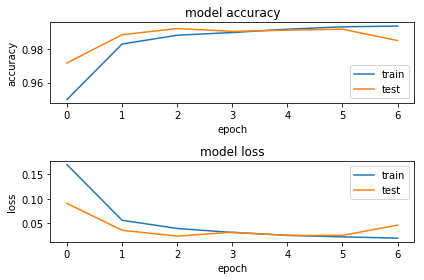

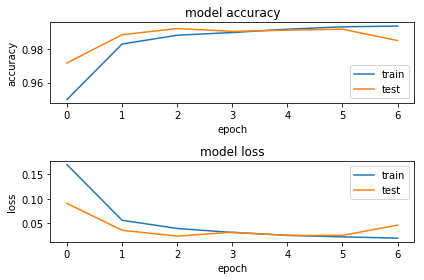

In [5]:
from keras.models import Sequential
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_info.history['acc'])
plt.plot(model_info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

<h2> CNN + ReLU + ADAM with 5 Layers </h2> 

In [6]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 7

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(24, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_info=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 55s 919us/step - loss: 0.3951 - acc: 0.8738 - val_loss: 0.0674 - val_acc: 0.9795
Epoch 2/7
60000/60000 [==============================] - 47s 785us/step - loss: 0.1019 - acc: 0.9700 - val_loss: 0.0440 - val_acc: 0.9864
Epoch 3/7
60000/60000 [==============================] - 49s 809us/step - loss: 0.0743 - acc: 0.9779 - val_loss: 0.0313 - val_acc: 0.9905
Epoch 4/7
60000/60000 [==============================] - 53s 880us/step - loss: 0.0608 - acc: 0.9824 - val_loss: 0.0237 - val_acc: 0.9922
Epoch 5/7
60000/60000 [==============================] - 50s 841us/step - loss: 0.0517 - acc: 0.9856 - val_loss: 0.0233 - val_acc: 0.9919
Epoch 6/7
60000/60000 [==============================] - 48s 801us/step - loss: 0.0447 - acc: 0.9869 - val_loss: 0.0208 - val_acc: 0.9929
Epoch 7/7
60000/60000 [==========================

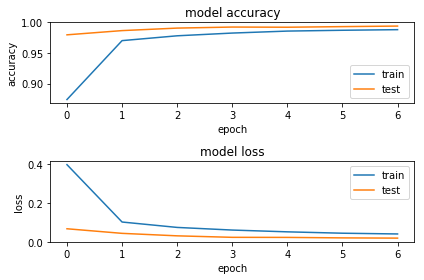

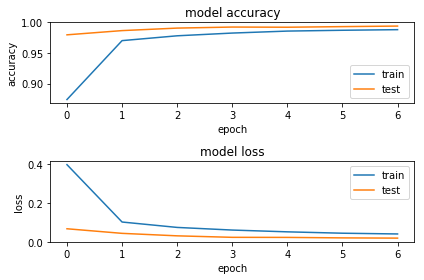

In [7]:
from keras.models import Sequential
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_info.history['acc'])
plt.plot(model_info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

<h2> CNN + ReLU + ADAM with 7 Layers </h2> 

In [8]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization

batch_size = 128
num_classes = 10
epochs = 7

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(24, kernel_size=(2, 2),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())


model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(32, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (2, 2), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_info=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/7
60000/60000 [==============================] - 193s 3ms/step - loss: 0.6113 - acc: 0.8086 - val_loss: 0.0943 - val_acc: 0.9730
Epoch 2/7
60000/60000 [==============================] - 243s 4ms/step - loss: 0.1568 - acc: 0.9550 - val_loss: 0.0659 - val_acc: 0.9800
Epoch 3/7
60000/60000 [==============================] - 195s 3ms/step - loss: 0.1063 - acc: 0.9690 - val_loss: 0.0519 - val_acc: 0.9850
Epoch 4/7
60000/60000 [==============================] - 202s 3ms/step - loss: 0.0848 - acc: 0.9754 - val_loss: 0.0503 - val_acc: 0.9868
Epoch 5/7
60000/60000 [==============================] - 189s 3ms/step - loss: 0.0716 - acc: 0.9791 - val_loss: 0.0412 - val_acc: 0.9881
Epoch 6/7
60000/60000 [==============================] - 223s 4ms/step - loss: 0.0646 - acc: 0.9811 - val_loss: 0.0365 - val_acc: 0.9904
Epoch 7/7
60000/60000 [==============================] 

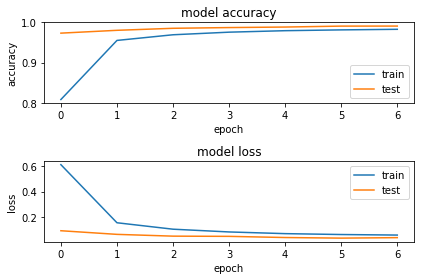

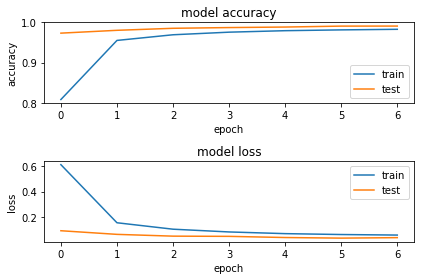

In [9]:
from keras.models import Sequential
import os
import matplotlib.pyplot as plt
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_info.history['acc'])
plt.plot(model_info.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.subplot(2,1,2)
plt.plot(model_info.history['loss'])
plt.plot(model_info.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()
fig

# Results

In [11]:
from prettytable import PrettyTable
x = PrettyTable()

names = ["Relu with 3 layers", "Relu with 5 layers", "Relu with 7 layers"]
Test_Accuracy = [98.51, 99.3, 99.05]
Test_Loss = [0.046,0.019,0.040] 
numbering = [1,2,3]
ptable = PrettyTable()
# Adding columns
ptable.add_column("S.NO.",numbering)
ptable.add_column("MODEL",names)

ptable.add_column("Test Score",Test_Loss)
ptable.add_column("Test Accuracy",Test_Accuracy)
# Printing the Table
print(ptable)

+-------+--------------------+------------+---------------+
| S.NO. |       MODEL        | Test Score | Test Accuracy |
+-------+--------------------+------------+---------------+
|   1   | Relu with 3 layers |   0.046    |     98.51     |
|   2   | Relu with 5 layers |   0.019    |      99.3     |
|   3   | Relu with 7 layers |    0.04    |     99.05     |
+-------+--------------------+------------+---------------+
